In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [11]:
df = pd.read_csv("data_delete.csv", encoding='gbk', dtype=float)
df.head()

,年（00～99）,月（01～12）,日（01～31）,时（00～23）,分（00～59）,秒（00～59）,M1车电机1温度T1 1=1℃,M1车电机2温度T2 1=1℃,M1车电机3温度T3 1=1℃,M1车电机4温度T4 1=1℃,...,DTO模式,ATO模式,ATP模式,当前站台号,下一站台号,终点站台号,牵引制动级位信号(1=1%),M1车DCU中等故障,列车综合速度（1=0.1km/h）,M1车环温值
0,18.0,5.0,1.0,0.0,0.0,0.0,97.0,96.000000,101.0,99.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,18.0,5.0,1.0,0.0,0.0,1.0,97.0,95.666667,101.0,99.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
2,18.0,5.0,1.0,0.0,0.0,5.0,97.0,96.000000,101.0,99.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
3,18.0,5.0,1.0,0.0,0.0,6.0,97.0,96.000000,101.0,99.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
4,18.0,5.0,1.0,0.0,0.0,7.0,97.0,96.000000,101.0,99.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


In [22]:
error = ["M1车DCU中等故障"]
time_list = ["年（00～99）","月（01～12）","日（01～31）","时（00～23）","分（00～59）","秒（00～59）"]
feature_list = list(set(list(df)).difference(set(error)))
feature_list = list(set(list(feature_list)).difference(set(time_list)))
feature_list.sort()

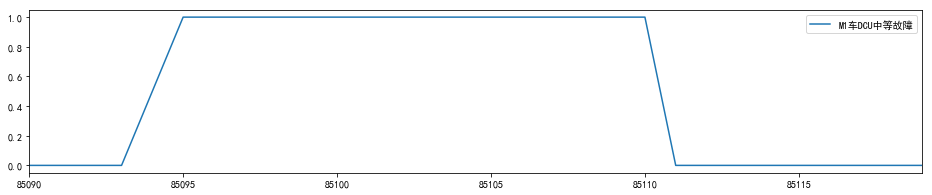

In [29]:
df[error].iloc[range(85090,85120)].plot(figsize=(16, 3))

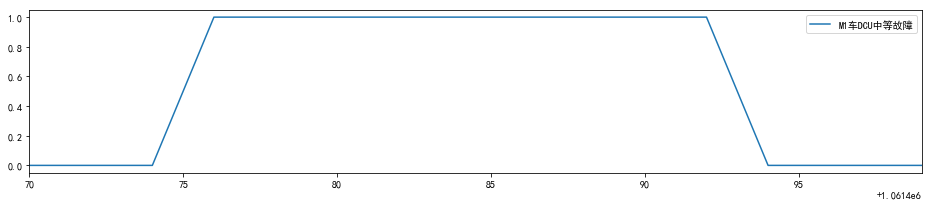

In [30]:
df[error].iloc[range(1061470,1061500)].plot(figsize=(16, 3))

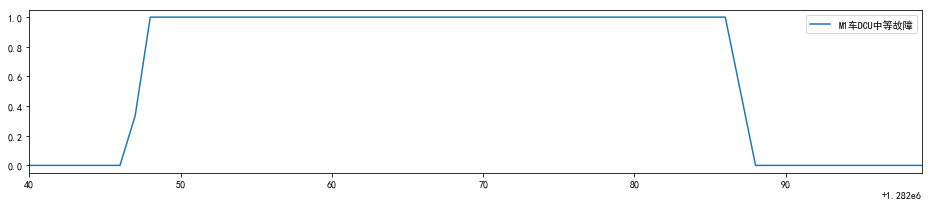

In [31]:
df[error].iloc[range(1282040,1282100)].plot(figsize=(16, 3))

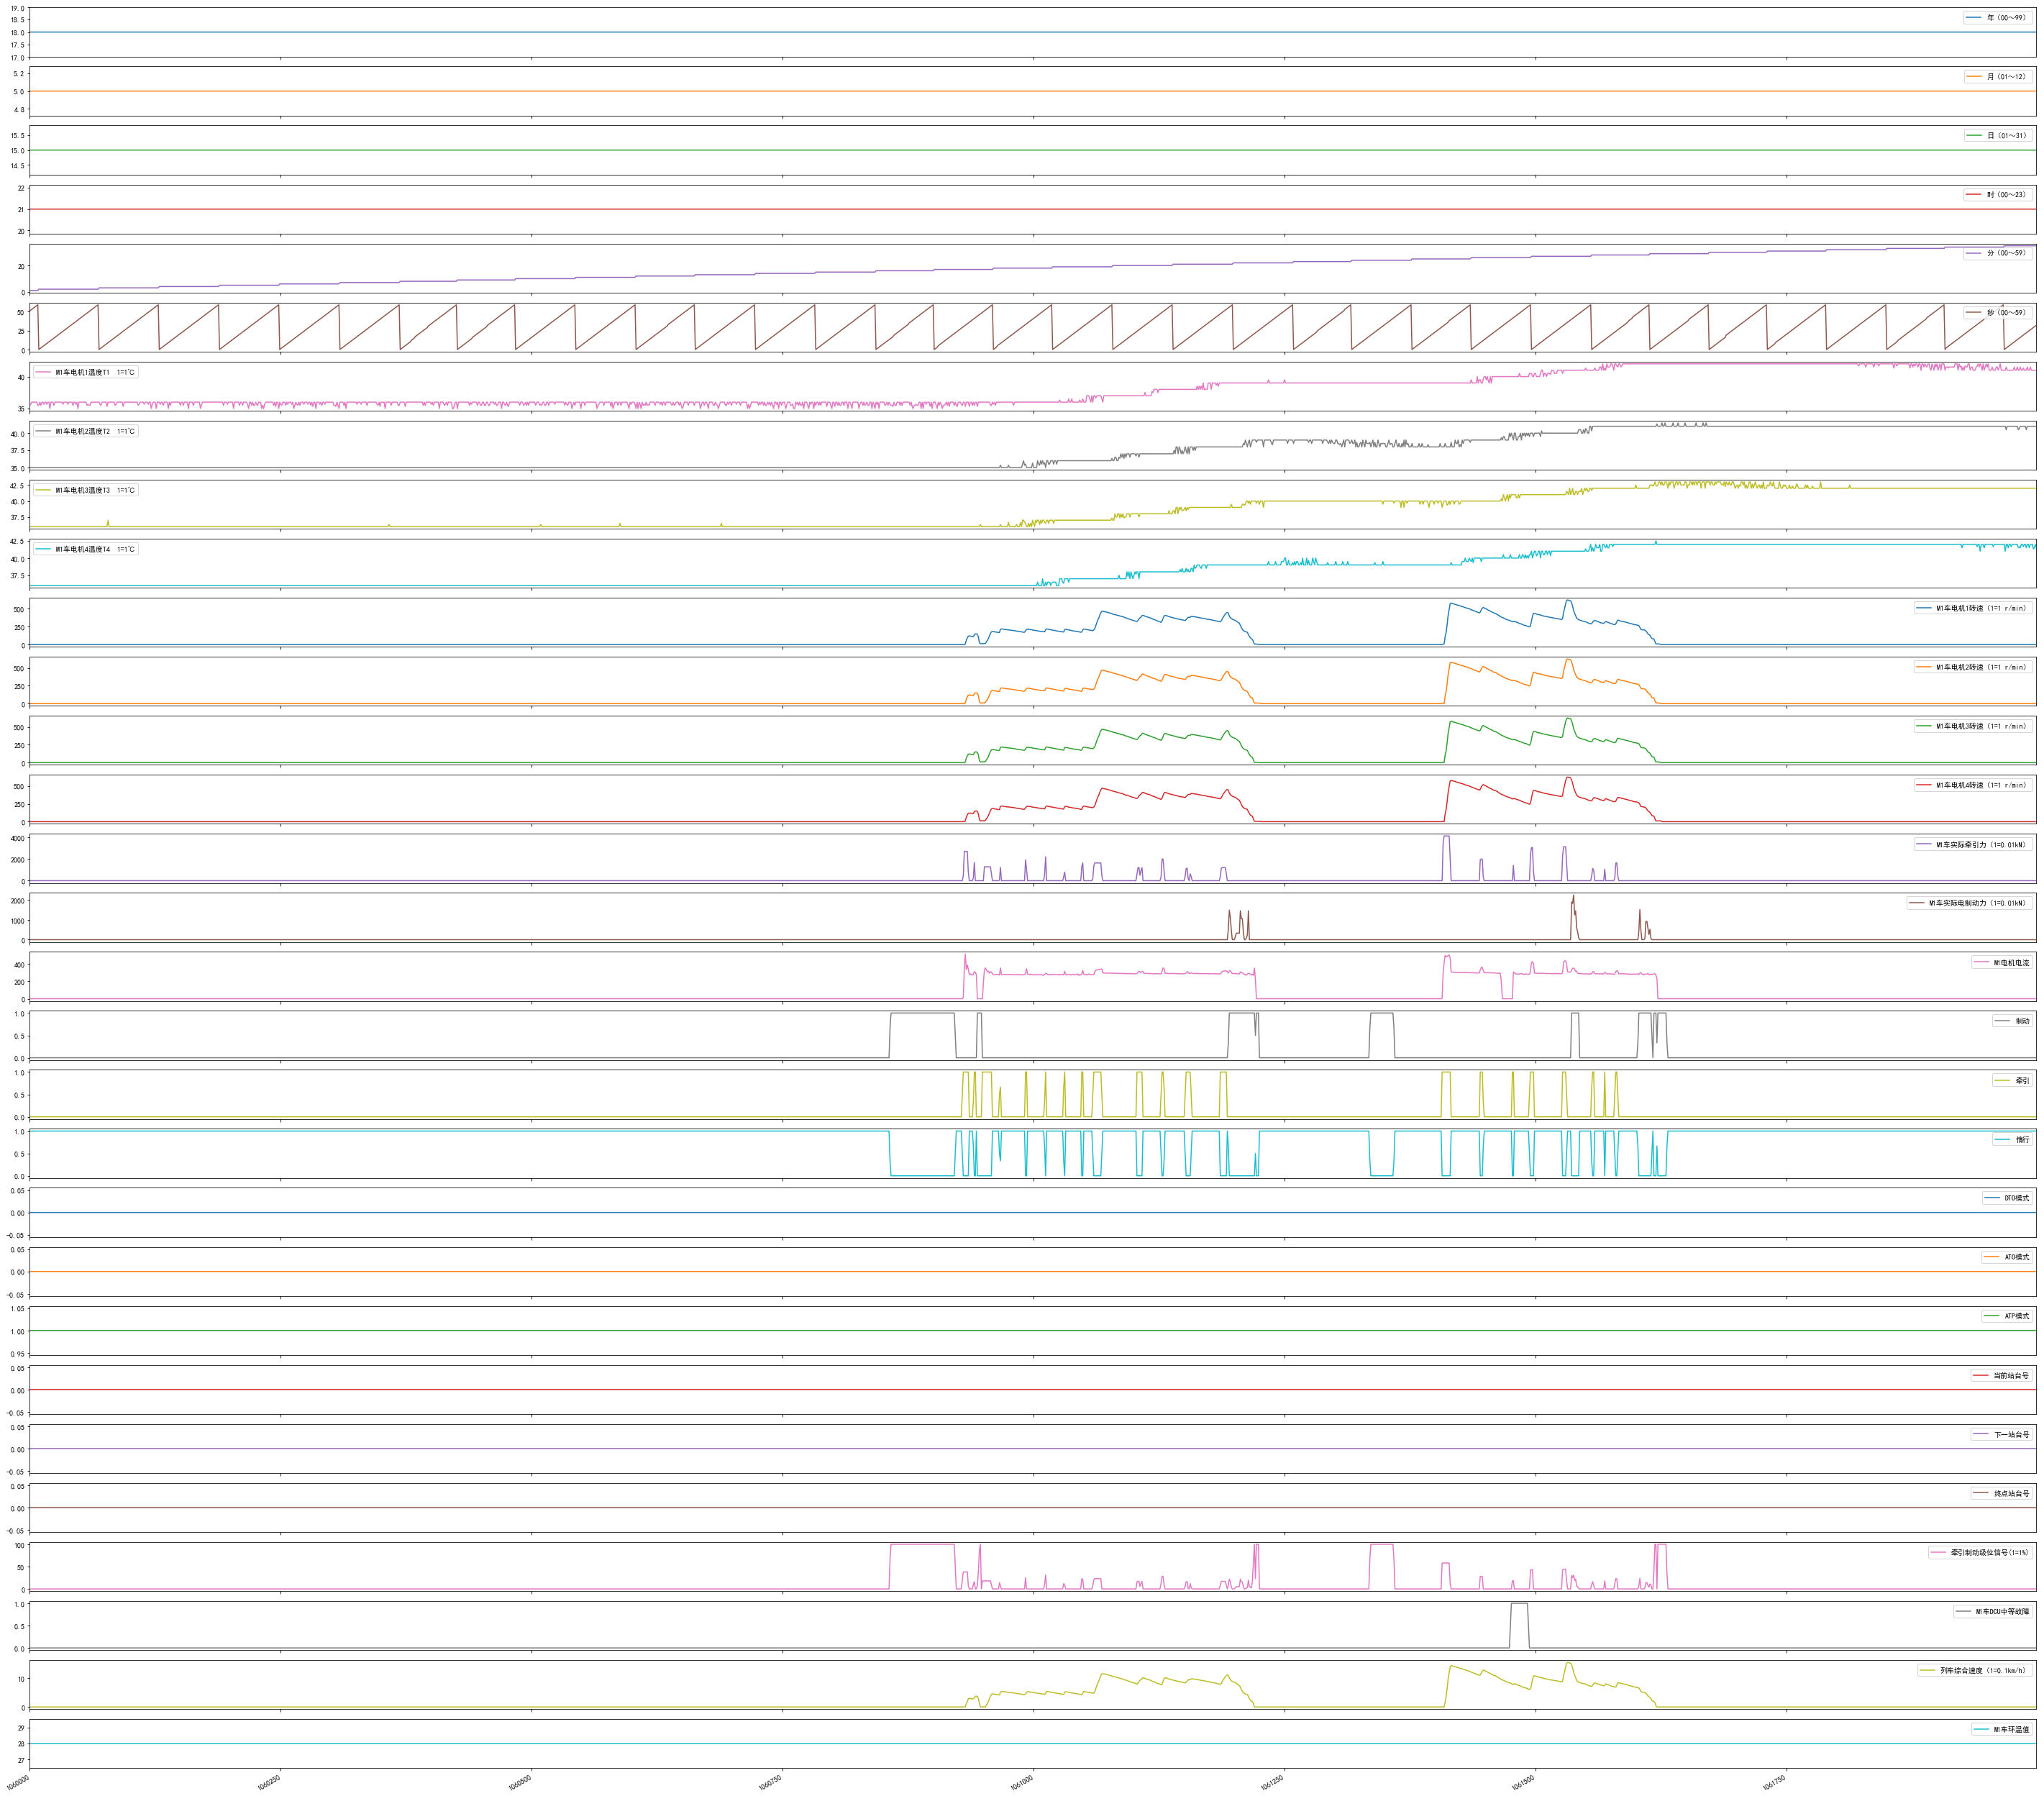

In [28]:
df1 = df[1060000:1062000]
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
df1.plot(subplots=True, sharex=True,figsize=(50,50))
plt.legend(loc = 'upper right')

In [107]:
x = df[feature_list].values
y = df[error].values

In [150]:
length = 4000
window_size = 50
error_time = [85093, 1061474, 1282046]

In [151]:
from sklearn.preprocessing import StandardScaler
data = []
for i in range(len(error_time)):
    idx1 = error_time[i] - length - window_size
    idx2 = error_time[i] - window_size
    for j in range(idx1,idx2):
        indices = range(j, j + window_size)
        data.append(x[indices].reshape((-1))) 
data = np.array(data)
data = StandardScaler().fit_transform(data)

In [152]:
pca = PCA(n_components=2)
data_2dim = pca.fit_transform(data)

estimator = KMeans(n_clusters=2)
estimator.fit(data_2dim)
y_pred = estimator.labels_
center = estimator.cluster_centers_
data_2dim.shape

(12000, 2)

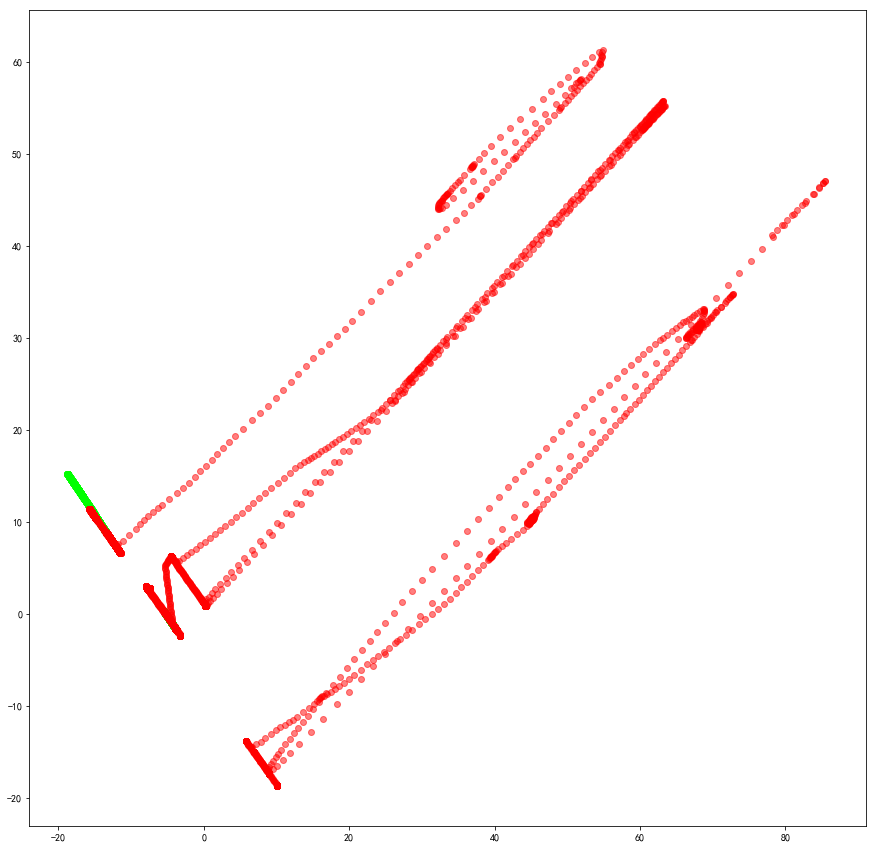

In [153]:
color = ['darkviolet','r','lime','g','c','yellow','dodgerblue','m','crimson','orange']
plt.figure(figsize=(15,15))
for i in range(y_pred.size):
    j = i % length
    if j< length/2:
        color = 'lime'
    else:
        color = 'r'
    plt.scatter(data_2dim[i,0],data_2dim[i,1], c=color,alpha=0.5)

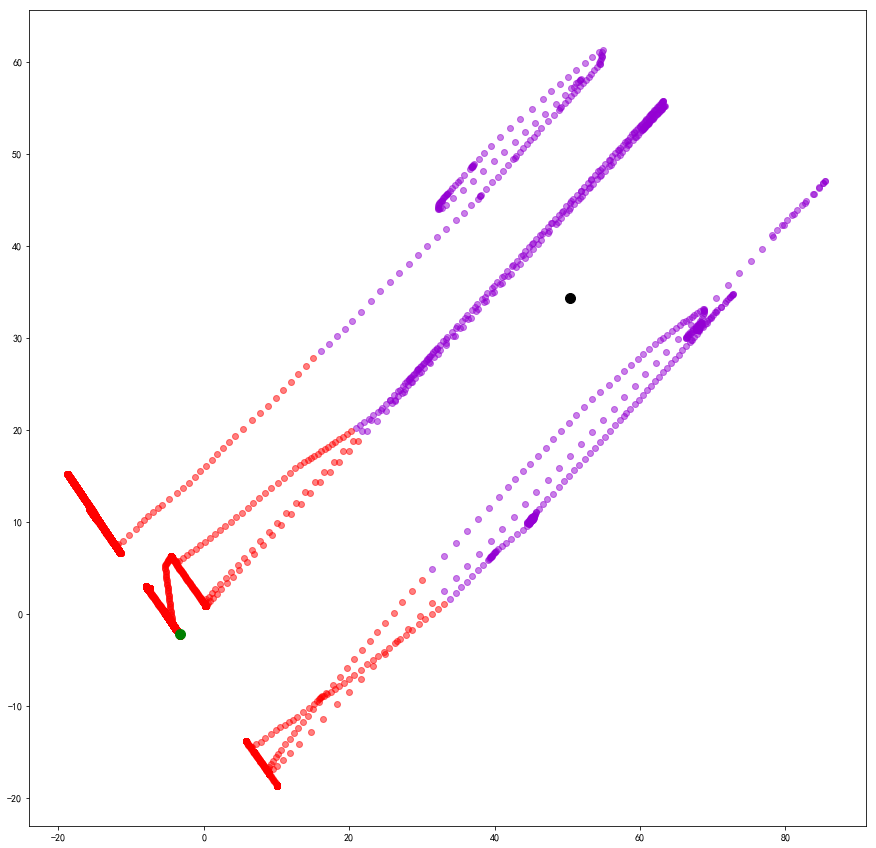

In [154]:
color = ['darkviolet','r','lime','g','c','yellow','dodgerblue','m','crimson','orange']
plt.figure(figsize=(15,15))
for i in range(y_pred.size):
    plt.scatter(data_2dim[i,0],data_2dim[i,1], c=color[y_pred[i]],alpha=0.5)
plt.scatter(center[0,0],center[0,1],s=100,c='black')
plt.scatter(center[1,0],center[1,1],s=100,c='g')


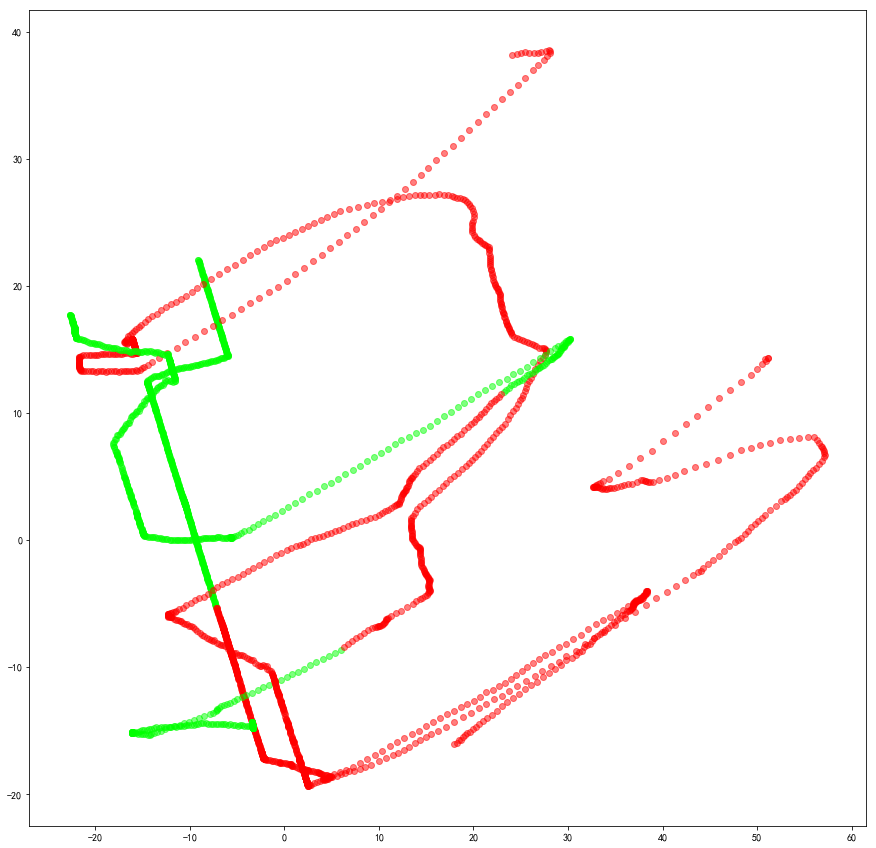